<a href="https://colab.research.google.com/github/ryanhassell/IDS/blob/main/HW4/problem1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ryan Hassell

# Importing and Cleaning Data

In [3]:
#import
library(readr)

#import the csv file
adult_training <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)

In [4]:
# print the csv
summary(adult_training)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

We have to clean the csv of noise, notably the 0s and 99999s. I have done this by replacing every instance of 0 or 99999 with NaN, and then replacing all NaN with the column averages.

In [8]:
# get rid of 0 and 99999
adult_training$`capital-gain` <- ifelse(adult_training$`capital-gain` == 0, yes = NA, no = adult_training$`capital-gain`)
adult_training$`capital-gain` <- ifelse(adult_training$`capital-gain` == 99999, yes = NA, no = adult_training$`capital-gain`)
adult_training$`capital-loss` <- ifelse(adult_training$`capital-loss` == 0, yes = NA, no = adult_training$`capital-loss`)

# replace bad values with average
adult_training$`capital-gain` <- ifelse(is.na(adult_training$`capital-gain`), mean(adult_training$`capital-gain`, na.rm = TRUE), adult_training$`capital-gain`)
adult_training$`capital-loss` <- ifelse(is.na(adult_training$`capital-loss`), mean(adult_training$`capital-loss`, na.rm = TRUE), adult_training$`capital-loss`)

summary(adult_training)


      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss 
 Length:14797       Length:14797       Min.   :  114   Min.   : 213  
 Class :character   Class :character   1st Qu.: 7637   1st Qu.:1878  
 Mode  :character   Mode  :character   Median : 7637   Median :1878  
                                       Mean   : 7637   Mean   :1878  
                                       3rd Qu.: 7637   3rd Qu.:1878  
                                       Max.   :41310   Max.   :4356  
    income   

Our data is now cleaned and ready to be plotted, etc.

# Contingency Table of Working Class and Sex

We now need to create a table for working class and sex.

In [18]:
# create table
ws_table <- table(adult_training$sex, adult_training$workclass)
print(ws_table)

        
            ? Federal-gov Local-gov Never-worked Private Self-emp-inc
  Female  377         149       377            1    3574           54
  Male    452         305       592            4    6707          444
        
         Self-emp-not-inc State-gov Without-pay
  Female              178       201           1
  Male                992       385           4


# Plot of Contingency Table of Working Class Sex

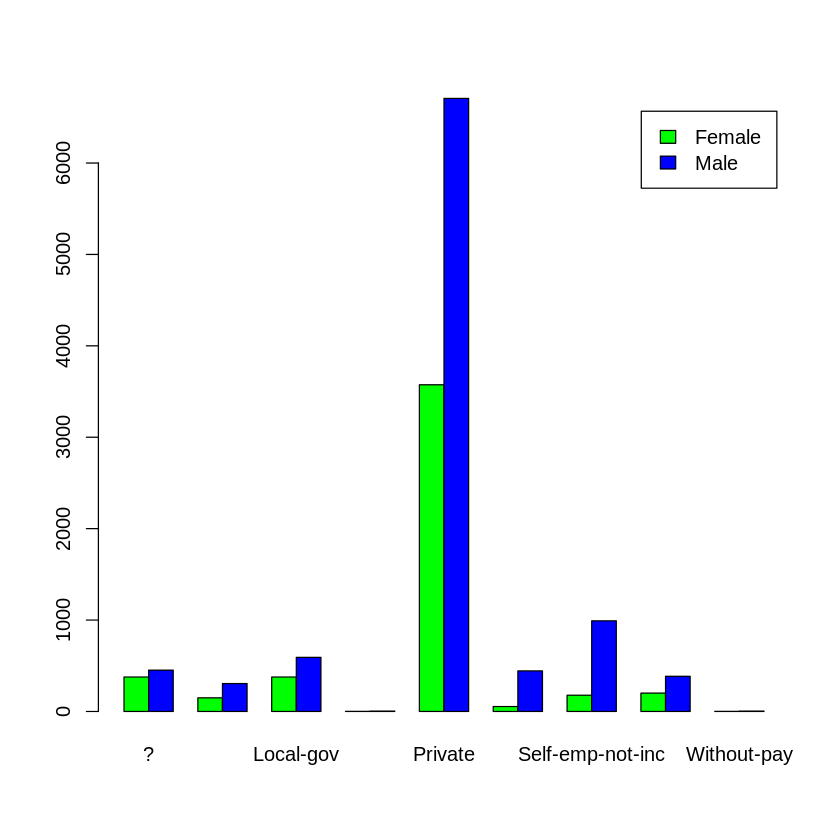

In [24]:
# create graph for working class and sex
barplot(ws_table, legend = rownames(ws_table), beside = TRUE, col=c("green","blue"))

From this graph, we can determine that most people are working for private companies, and almost none have worked without pay or have never worked at all.

# Marital Status and Sex Contingency Table


In [25]:
# create table for marital status and sex
mss_table <- table(data$sex, data$`marital-status`)
print(mss_table)

        
         Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent
  Female     1219                 7                761                    95
  Male        795                 4               6010                   104
        
         Never-married Separated Widowed
  Female          2160       290     380
  Male            2717       182      73


# Contingency Plot of Marital Status and Sex

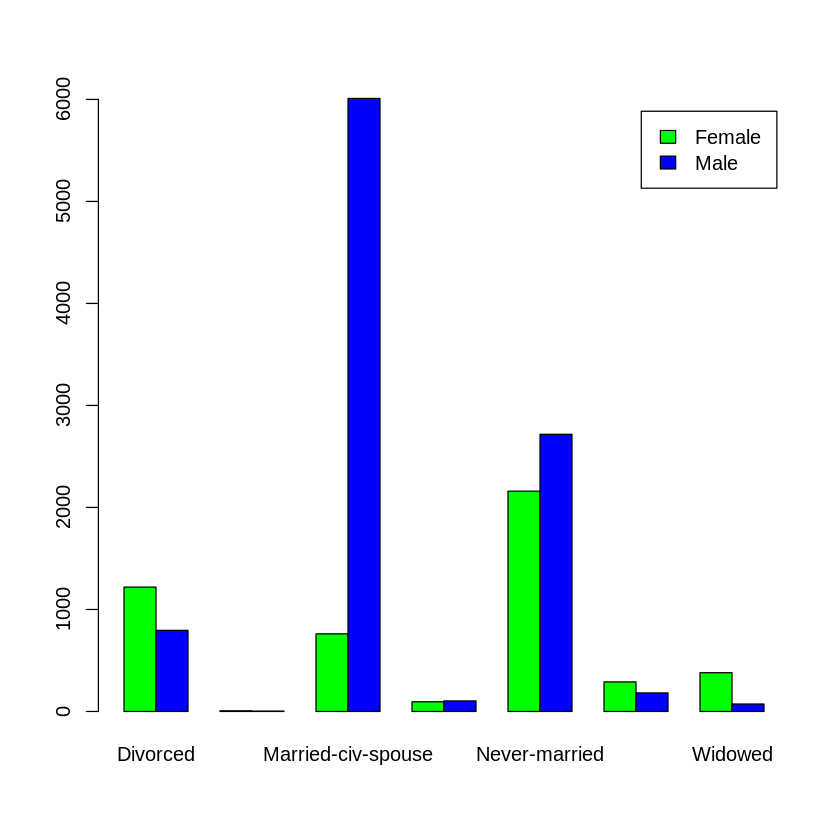

In [27]:
# create bar plot
barplot(mss_table, legend = rownames(ws_table), beside = TRUE, col=c("green","blue"))

From this data we can deduce that more men are married to civ-spouses, or spouses that are civilians.

# Adults over 40


In [35]:
# create dataframe for people above age 40
adultAbove40 <- adult_training[adult_training$age > 40, ]

In [37]:
# create table with marital status and sex for individuals above 40
mss_40 <- table(adultAbove40$sex, adultAbove40$`marital-status`)
print(mss_40)

        
         Divorced Married-civ-spouse Married-spouse-absent Never-married
  Female      720                305                    38           256
  Male        448               3383                    47           315
        
         Separated Widowed
  Female       133     354
  Male          74      71


# Over 40 Martial-Sex Contingency Table Plot

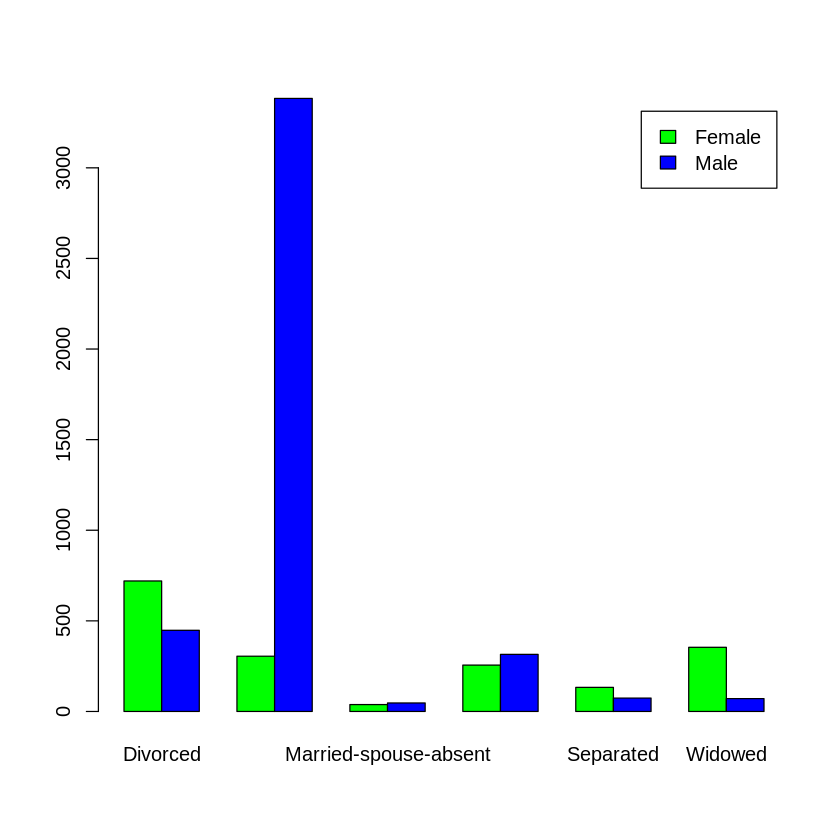

In [39]:
# create bar plot
barplot(mss_40, legend = rownames(ws_table), beside = TRUE, col=c("green","blue"))

From this data we can deduce that the population above 40 is more-married than the whole population.

# Education Outliers

In [65]:
# create a new education column without outliers
adult_training$education_no_outliers <- scale(x = adult_training$education)

summary(adult_training$education_no_outliers)

       V1          
 Min.   :-3.49029  
 1st Qu.:-0.41135  
 Median :-0.02648  
 Mean   : 0.00000  
 3rd Qu.: 0.74326  
 Max.   : 2.28273  

In [66]:
# define 3sig rule
threesig_education <- (adult_training$education_no_outliers > 3) | (adult_training$education_no_outliers < -3)
# 3sig for edu
education_outliers <- adult_training$education_no_outliers[which(threesig_education)]

cat("Num Outliers in Education Column:", length(education_outliers))

Num Outliers in Education Column: 113

#Age Outliers


In [44]:
# create column with no outliers in age
adult_training$age_no_outliers <- scale(x = adult_training$age)

summary(adult_training$age_no_outliers)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  

In [45]:
# define 3sig rule
threesig_age <- (adult_training$age_no_outliers > 3) | (adult_training$age_no_outliers < -3)
# 3sig for age
age_outliers <- adult_training$age_no_outliers[which(threesig_age)]

cat("Num Outliers in Education Column:", length(age_outliers))

Num Outliers in Education Column: 60

# Age Anomalies Check

In [58]:
# create new table of all people above or at age 80
age_anomaly <- adult_training[adult_training$age >= 80 , ]

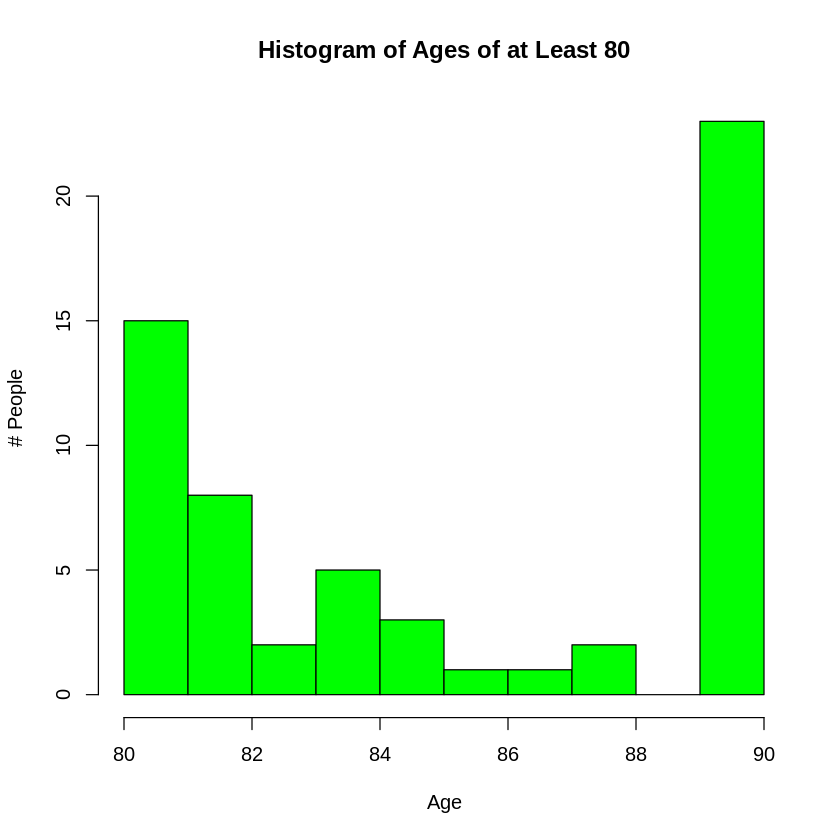

In [64]:
# create graph
hist(age_anomaly$age, col="green", main = "Histogram of Ages of at Least 80", breaks=10, xlab = "Age", ylab = "# People")

From this graph, I can deduce that an overwhelming majority of people are between the ages of 88-90 within this set of people.

# Summary

Following cleaning the data and creation of tables and graphs, I can deduce a few things:
*   The majority of people in the working class work at private firms
*   The majority of men are married to civ-spouses
*   The majority of people above 40 are married
*   The majority of individuals above 80 years of age are between 88 years and 90 years old